# Assignments for "Cross Validation"

In this assignment, you are going to measure the performance of the model you created with the Titanic dataset in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate your model's performance with cross validation and using different metrics.
- Determine the model with the most appropriate parameters by hyperparameter tuning.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("new-data.csv", sep=",")
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,0,3,1,22.00,1,0,7.2500,0,0,1
1,1,1,1,0,38.00,1,0,71.2833,1,0,0
2,2,1,3,0,26.00,0,0,7.9250,0,0,1
3,3,1,1,0,35.00,1,0,53.1000,0,0,1
4,4,0,3,1,35.00,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,27.00,0,0,13.0000,0,0,1
887,887,1,1,0,19.00,0,0,30.0000,0,0,1
888,888,0,3,0,27.25,1,2,23.4500,0,0,1
889,889,1,1,1,26.00,0,0,30.0000,1,0,0


In [3]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)

In [4]:
from sklearn.preprocessing import StandardScaler
list = ["Age","Fare"]
for i in list:
    df[i] = StandardScaler().fit_transform(df[[i]])
df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,-0.571726,1,0,-0.502445,0,0,1
1,1,1,0,0.625395,1,0,0.786845,1,0,0
2,1,3,0,-0.272446,0,0,-0.488854,0,0,1
3,1,1,0,0.400935,1,0,0.420730,0,0,1
4,0,3,1,0.400935,0,0,-0.486337,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.197626,0,0,-0.386671,0,0,1
887,1,1,0,-0.796186,0,0,-0.044381,0,0,1
888,0,3,0,-0.178921,1,2,-0.176263,0,0,1
889,1,1,1,-0.272446,0,0,-0.044381,1,0,0


In [5]:
y=df["Survived"]
X=df[["Sex", "Pclass", "Age","SibSp","Parch","Fare","C","Q","S"]]

In [6]:
print(len(X), len(y))
print("There are {} data points in dataset.".format(len(X)))

891 891
There are 891 data points in dataset.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of data points in training set:  {}  ".format(len(X_train)))
print("Number of targets in training set    :  {}\n".format(len(y_train)))

print("Number of data points in test set    :  {}  ".format(len(X_test)))
print("Number of targets in test set        :  {}  ".format(len(y_test)))

Number of data points in training set:  712  
Number of targets in training set    :  712

Number of data points in test set    :  179  
Number of targets in test set        :  179  


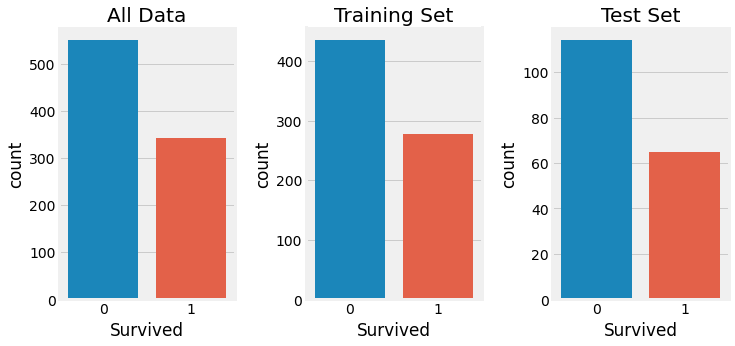

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %61 
Proportion of '0' in test set     : %64 


In [8]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %62 
Proportion of '0' in test set     : %61 


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.8212290502793296

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [12]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 712
No.1 Test set size     : 179
---------------------------- 

No.2 Train set size : 713
No.2 Test set size     : 178
---------------------------- 

No.3 Train set size : 713
No.3 Test set size     : 178
---------------------------- 

No.4 Train set size : 713
No.4 Test set size     : 178
---------------------------- 

No.5 Train set size : 713
No.5 Test set size     : 178
---------------------------- 



In [13]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_indeks], y.iloc[train_indeks]
    X_test, y_test = X.iloc[test_indeks], y.iloc[test_indeks]
    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.844
----------------------- 

Piece No.2 score: 0.826
----------------------- 

Piece No.3 score: 0.764
----------------------- 

Piece No.4 score: 0.837
----------------------- 

Piece No.5 score: 0.775
----------------------- 



In [14]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.81


In [15]:
from sklearn.model_selection import cross_validate, cross_val_score
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.80774032 0.8042394  0.81670823 0.79551122 0.79800499 0.80673317
 0.80174564 0.8042394  0.80673317 0.79800499]
--------------------------------------------------
Test Scores     :
[0.78888889 0.79775281 0.75280899 0.80898876 0.78651685 0.7752809
 0.78651685 0.78651685 0.82022472 0.83146067]


In [16]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.8039660524095502
Mean score of test set  :  0.7934956304619226


In [17]:
cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy', 'precision', 'r2']
                   )

In [18]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.80  
Train Set Mean R-square  : 0.17  
Train Set Mean Precision : 0.76

Test Set Mean Accuracy   : 0.79  
Test Set Mean R-square   : 0.13  
Test Set Mean Precision  : 0.75  


In [19]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')

Model Scores : 
[0.78888889 0.79775281 0.75280899 0.80898876 0.78651685 0.7752809
 0.78651685 0.78651685 0.82022472 0.83146067]


In [20]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X,
                           y=y,
                           cv=10,
                          )
print(y_pred[0:10])

[0 1 1 1 0 0 0 0 1 1]


### HYPERPARAMETER TUNING

In [21]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### GridSearch

In [22]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [23]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [24]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
Best Score      :  0.7968913857677903


In [25]:
import pandas as pd

results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty
0,0.000898,3.002157e-04,0.000000,0.000000,1e-05,l1
1,0.004986,7.803788e-04,0.001496,0.000499,1e-05,l2
2,0.000698,4.570226e-04,0.000000,0.000000,0.0001,l1
3,0.003989,7.152557e-08,0.001197,0.000399,0.0001,l2
4,0.000698,4.570694e-04,0.000000,0.000000,0.001,l1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
mean_fit_time        20 non-null float64
std_fit_time         20 non-null float64
mean_score_time      20 non-null float64
std_score_time       20 non-null float64
param_C              20 non-null object
param_penalty        20 non-null object
params               20 non-null object
split0_test_score    10 non-null float64
split1_test_score    10 non-null float64
split2_test_score    10 non-null float64
split3_test_score    10 non-null float64
split4_test_score    10 non-null float64
split5_test_score    10 non-null float64
split6_test_score    10 non-null float64
split7_test_score    10 non-null float64
split8_test_score    10 non-null float64
split9_test_score    10 non-null float64
mean_test_score      10 non-null float64
std_test_score       10 non-null float64
rank_test_score      20 non-null int32
dtypes: float64(16), int32(1), object(3)
memory usage: 3.2+ KB


In [26]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
9,l2,0.1,0.796891
13,l2,10,0.795730
15,l2,100,0.795730
17,l2,1000,0.795730
19,l2,10000,0.795730
11,l2,1,0.793496
7,l2,0.01,0.747528
5,l2,0.001,0.626292
1,l2,1e-05,0.616167
3,l2,0.0001,0.616167


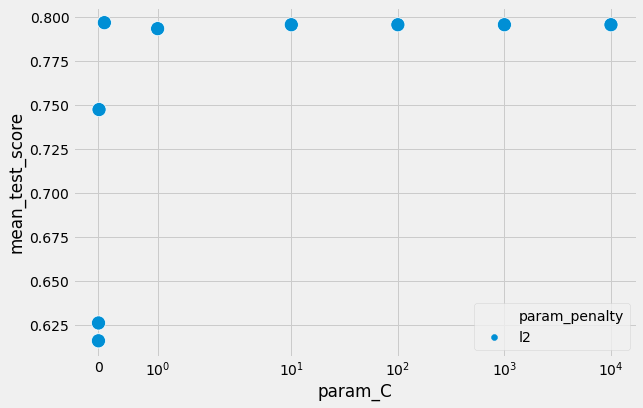

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.show()

#### Random Search

In [28]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [29]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [30]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 10} 

All precision values :  [0.         0.55       0.75113802 0.74807738        nan 0.75113802
        nan        nan        nan        nan] 

Best precision value :  0.7511380212267637


In [31]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
2,l2,10,0.751138
5,l2,1000,0.751138
3,l2,1,0.748077
1,l2,0.001,0.550000
0,l2,0.0001,0.000000
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


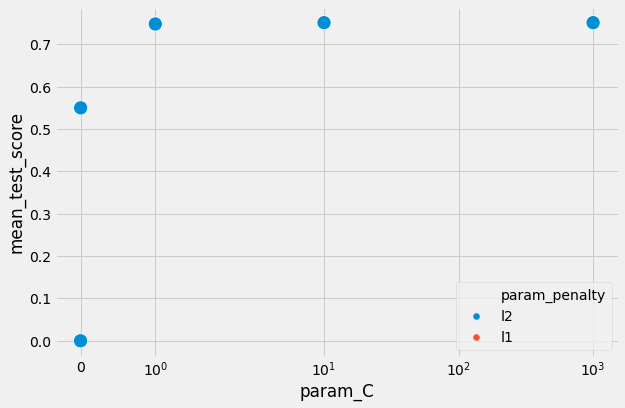

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.show()